# Import packages

In [1]:
import theano
import theano.tensor as T
import numpy as np
import h5py
def floatX(x):
    return np.asarray(x, dtype='float32')

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 5103)


# Load data to VRAM

In [2]:
h5f = h5py.File('mnist.hdf5','r')
data_x = theano.shared(h5f['train_data'][()])
data_y = theano.shared(np.asarray(h5f['train_label'][()], dtype='int32'))

# Create parameters in VRAM

In [15]:
w1 = theano.shared( floatX(np.random.uniform(low=-0.1, high=0.1, size=(784, 50))), name='w1')
w2 = theano.shared( floatX(np.random.uniform(low=-0.1, high=0.1, size=(50, 10))), name='w2')
b1 = theano.shared( floatX(np.zeros((50,))), name='b1')
b2 = theano.shared( floatX(np.zeros((10,))), name='b2')
params = [w1,w2,b1,b2]

# Model definition

$h_1=\sigma(w_1 x+b_1)$

$y=\sigma(w_2 h_1+b_2)$

$cost = -\frac{1}{N}\sum\limits_{i=1}^N \log y_i^{t_i} $ (Cross Entropy)

In [16]:
x = T.matrix('x')
t = T.ivector('t')
h1 = T.nnet.sigmoid(T.dot(x,w1)+b1)
y = T.nnet.softmax(T.dot(h1,w2)+b2)
cost = -T.mean(T.log(y)[T.arange(t.shape[0]), t])
acc = T.mean( T.eq(T.argmax(y, axis=1), t))

# Compile function

In [17]:
i = T.iscalar('i')
batch_size = 200
n_batches = int(data_x.get_value().shape[0] / batch_size)

grads = T.grad(cost, params)
nu = 0.01
updates = [(p, p-nu*grad) for p,grad in zip(params, grads)]
train_model = theano.function([i], [cost, acc], updates=updates, 
                              givens=[(x,data_x[i*batch_size:(i+1)*batch_size]),
                                      (t,data_y[i*batch_size:(i+1)*batch_size])])

# Training

In [18]:
for epoch in xrange(100):
    cost_vals = []
    acc_vals = []
    for bi in xrange(n_batches):
        cost_val, acc_val = train_model(bi)
        cost_vals.append(cost_val)
        acc_vals.append(acc_val)
    print("Epoch {} Cost {} Acc {}".format(epoch, np.mean(cost_vals), np.mean(acc_vals)))

Epoch 0 Cost 2.28430080414 Acc 0.16568
Epoch 1 Cost 2.23072576523 Acc 0.31576
Epoch 2 Cost 2.16559720039 Acc 0.4519
Epoch 3 Cost 2.07869124413 Acc 0.52946
Epoch 4 Cost 1.96711051464 Acc 0.57898
Epoch 5 Cost 1.8354049921 Acc 0.61636
Epoch 6 Cost 1.69437158108 Acc 0.64856
Epoch 7 Cost 1.55574584007 Acc 0.67594
Epoch 8 Cost 1.42768335342 Acc 0.70112
Epoch 9 Cost 1.31386482716 Acc 0.72428
Epoch 10 Cost 1.21475768089 Acc 0.74422
Epoch 11 Cost 1.12913167477 Acc 0.76052
Epoch 12 Cost 1.05514717102 Acc 0.77376
Epoch 13 Cost 0.990954458714 Acc 0.78586
Epoch 14 Cost 0.934937477112 Acc 0.79674
Epoch 15 Cost 0.885762572289 Acc 0.80642
Epoch 16 Cost 0.84234815836 Acc 0.81436
Epoch 17 Cost 0.80381667614 Acc 0.82162
Epoch 18 Cost 0.769449591637 Acc 0.82766
Epoch 19 Cost 0.738653421402 Acc 0.833
Epoch 20 Cost 0.710933566093 Acc 0.83844
Epoch 21 Cost 0.685876309872 Acc 0.84268
Epoch 22 Cost 0.663133442402 Acc 0.84736
Epoch 23 Cost 0.64241206646 Acc 0.85094
Epoch 24 Cost 0.623464763165 Acc 0.85452
Epoch

Populating the interactive namespace from numpy and matplotlib


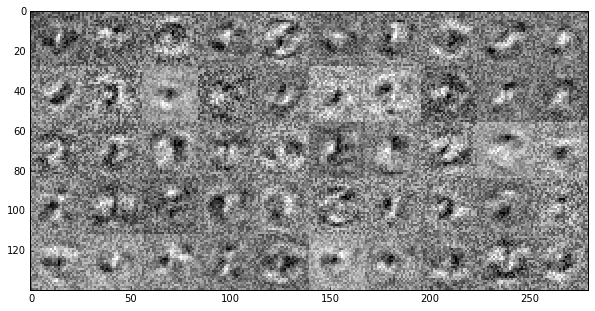

In [19]:
import matplotlib.pyplot as plt
%pylab inline
size_h = 28
size_w = 28
def viz_tile_images(imgs, n_col=10, normalize=True):
    num = imgs.shape[0]
    n_row = int((num-1)/n_col)+1
    total_img = np.zeros((n_row*size_h, n_col*size_w))
    for r in xrange(n_row):
        for c in xrange(n_col):
            idx = r*n_col+c
            if idx < num:
                img = np.reshape(imgs[idx], (size_w, size_h))
                if normalize:
                    img = (img - np.min(img))/(np.max(img) - np.min(img))
                total_img[r*size_h:(r+1)*size_h, c*size_w:(c+1)*size_w] = img
    
    orig_fig_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = (n_col,n_row)
    plt.imshow(total_img, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.rcParams['figure.figsize'] = orig_fig_size
    

viz_tile_images(w1.get_value().T)